In [1]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append("/data/home/sjwan/projects/Y-chromosome/")
from utils.software import *
from utils.build_path import *
from utils.load import *
from utils.plot_func.plot_paf import parse_fai

In [2]:
sample_list = os.listdir('/data/home/sjwan/projects/Y-chromosome/workflow.output/data/verkko1.4')
sample_list.sort()
fai_path = '/data/home/sjwan/projects/Y-chromosome/workflow.output/data/T2T_Y_subregion.fa.fai'
fai = pd.DataFrame(parse_fai(fai_path)).T
ref_name = fai.index

In [124]:
all_merage = []

for sample in sample_list:
    paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample}/minimap.subregion.Ycontigs/subregion.minimap.paf'
    paf = parse_paf(paf_path)
    Y_subregion = paf['target_name'].unique()
    region_map = {}
    for region in Y_subregion:
        contig_list = paf[paf['target_name']==region]
        region_map[region] = contig_list
    map_score = {}
    map_diff = {}
    map_regions = {}
    for region in Y_subregion:
        group = region_map[region][['query_name', 'query_length', 'query_start', 'query_end', 'strand',
        'target_name', 'target_length', 'target_start', 'target_end',]]
        coverage = np.zeros(shape=np.max(group['target_length']), dtype=np.int8)
        for idx, row in group.iterrows():
            coverage[row['target_start']:row['target_end']] = 1
        diff = np.diff(coverage)
        map_diff[region] = np.sum(np.diff(coverage)==-1)
        map_score[region] = np.sum(coverage)/row['target_length']
        map_regions[region] = list(region_map[region]['query_name'].values)
    df = []
    for region in Y_subregion:
        row = [region, map_regions[region], map_diff[region], map_score[region]]
        df.append(row)
    df = pd.DataFrame(df,columns=['name','regions','diff','score']).set_index('name')
    all_merage.append(df)
all_merage = pd.concat(all_merage, axis=1)

In [128]:
# all_merage = pd.concat(all_merage, axis=1)
arrays = [
    [item for item in sample_list for _ in range(3)],
    ['regions','diff','score']*len(sample_list)
]

all_merage.columns = pd.MultiIndex.from_arrays(arrays)
all_merage = all_merage.loc[ref_name]

In [129]:
all_merage.columns

MultiIndex([(  'RY01_Yao_Male_CNYAM0001', 'regions'),
            (  'RY01_Yao_Male_CNYAM0001',    'diff'),
            (  'RY01_Yao_Male_CNYAM0001',   'score'),
            (  'RY02_Wei_Male_CNUGM0001', 'regions'),
            (  'RY02_Wei_Male_CNUGM0001',    'diff'),
            (  'RY02_Wei_Male_CNUGM0001',   'score'),
            (  'RY03_She_Male_CNSHM0001', 'regions'),
            (  'RY03_She_Male_CNSHM0001',    'diff'),
            (  'RY03_She_Male_CNSHM0001',   'score'),
            ( 'RY04_Miao_Male_CNMHM0001', 'regions'),
            ( 'RY04_Miao_Male_CNMHM0001',    'diff'),
            ( 'RY04_Miao_Male_CNMHM0001',   'score'),
            ('RY05_ChaoX_Male_CNCSM0001', 'regions'),
            ('RY05_ChaoX_Male_CNCSM0001',    'diff'),
            ('RY05_ChaoX_Male_CNCSM0001',   'score'),
            (  'RY09_Hui_Male_CNHUM0001', 'regions'),
            (  'RY09_Hui_Male_CNHUM0001',    'diff'),
            (  'RY09_Hui_Male_CNHUM0001',   'score'),
            ('RY11_TuJia_Mal

In [112]:
all_merage.loc[ref_name].to_csv('/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/analysis/coverage.csv')

In [146]:
res_scores = all_merage.loc[:, pd.IndexSlice[:, 'score']]
contiguous = np.mean(res_scores>=1,axis=1)

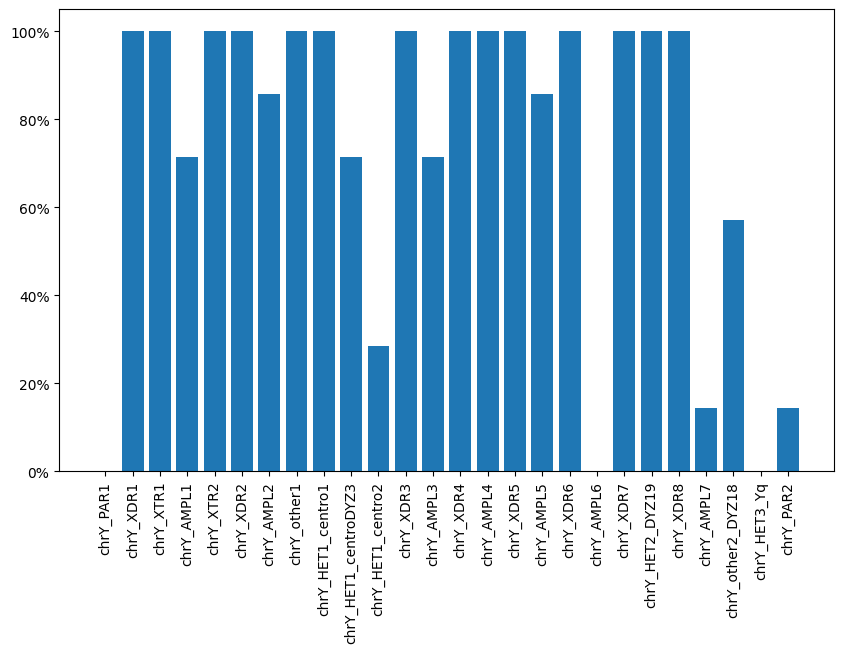

In [150]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.bar(x=ref_name,height=contiguous)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.show()

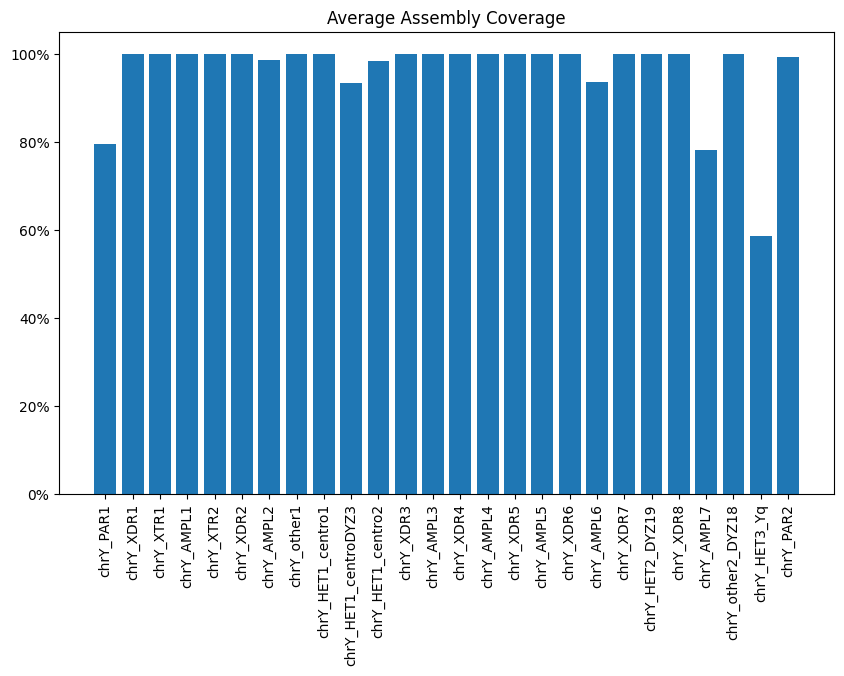

In [153]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(10,6))

plt.bar(x=ref_name,height=np.mean(res_scores,axis=1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(rotation=90)
plt.title('Average Assembly Coverage')
plt.show()

In [3]:
paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample_list[0]}/minimap.subregion.Ycontigs/subregion.minimap.paf'
paf = parse_paf(paf_path)

In [4]:
Y_subregion = paf['target_name'].unique()

In [35]:
region_map = {}
for region in Y_subregion:
    contig_list = paf[paf['target_name']==region]
    print(region, contig_list)
    region_map[region] = contig_list

chrY_XTR1            query_name  query_length  query_start  query_end strand  \
0  haplotype1-0000011      24090590     20193780   23380033      -   

  target_name  target_length  target_start  target_end  residue_matches  ...  \
0   chrY_XTR1        3187958             0     3187958          3185334  ...   

   nn  tp      cm       s1    s2      de      rl  \
0   0   P  575309  3179734  8143  0.0001  671945   

                                                  cg cs   zd  
0  12595M1I11554M7I13499M2D29572M2I58731M1I42857M...     NaN  

[1 rows x 25 columns]
chrY_AMPL2            query_name  query_length  query_start  query_end strand  \
1  haplotype1-0000011      24090590     16503465   18852718      -   
5  haplotype1-0000011      24090590     15904871   17151287      -   

  target_name  target_length  target_start  target_end  residue_matches  ...  \
1  chrY_AMPL2        3211045             0     2348443          2345079  ...   
5  chrY_AMPL2        3211045       1964696     32110

In [74]:
import numpy as np

map_score = {}
map_diff = {}
map_regions = {}
for region in Y_subregion:
    group = region_map[region][['query_name', 'query_length', 'query_start', 'query_end', 'strand',
    'target_name', 'target_length', 'target_start', 'target_end',]]
    coverage = np.zeros(shape=np.max(group['target_length']), dtype=np.int8)
    for idx, row in group.iterrows():
        coverage[row['target_start']:row['target_end']] = 1
    diff = np.diff(coverage)
    map_diff[region] = np.sum(np.diff(coverage)==-1)
    map_score[region] = np.sum(coverage)/row['target_length']
    map_regions[region] = list(region_map[region]['query_name'].values)

In [75]:
map_regions

{'chrY_XTR1': ['haplotype1-0000011'],
 'chrY_AMPL2': ['haplotype1-0000011', 'haplotype1-0000011'],
 'chrY_XDR3': ['haplotype1-0000011'],
 'chrY_XDR4': ['haplotype1-0000011'],
 'chrY_AMPL7': ['haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype2-0000105',
  'haplotype2-0000105'],
 'chrY_XDR7': ['haplotype1-0000011'],
 'chrY_HET1_centro2': ['haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011'],
 'chrY_XDR6': ['haplotype1-0000011'],
 'chrY_XDR8': ['haplotype1-0000011'],
 'chrY_XDR2': ['haplotype1-0000011'],
 'chrY_AMPL6': ['haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011',
  'haplotype1-0000011'],
 'chrY_PAR1': ['haplo

In [85]:
df = []
for region in Y_subregion:
    row = [region, map_regions[region], map_diff[region], map_score[region]]
    df.append(row)
df = pd.DataFrame(df,columns=['name','regions','diff','score']).set_index('name')

In [89]:
df.loc[ref_name]

,regions,diff,score
chrY_PAR1,"[haplotype1-0000011, haplotype1-0000038, haplo...",3,0.468632
chrY_XDR1,[haplotype1-0000011],0,1.000000
chrY_XTR1,[haplotype1-0000011],0,1.000000
chrY_AMPL1,[haplotype1-0000011],0,1.000000
chrY_XTR2,[haplotype1-0000011],0,1.000000
chrY_XDR2,[haplotype1-0000011],0,1.000000
chrY_AMPL2,"[haplotype1-0000011, haplotype1-0000011]",0,1.000000
chrY_other1,[haplotype1-0000011],0,1.000000
chrY_HET1_centro1,[haplotype1-0000011],0,1.000000
chrY_HET1_centroDYZ3,"[haplotype1-0000011, haplotype1-0000011, haplo...",0,1.000000


In [90]:
arrays = [
    ['sample1', 'sample1', 'sample1'],
    ['regions','diff','score']
]

df.columns = pd.MultiIndex.from_arrays(arrays)

In [91]:
df.loc[ref_name]

sample1       \
                                                                regions diff   
chrY_PAR1             [haplotype1-0000011, haplotype1-0000038, haplo...    3   
chrY_XDR1                                          [haplotype1-0000011]    0   
chrY_XTR1                                          [haplotype1-0000011]    0   
chrY_AMPL1                                         [haplotype1-0000011]    0   
chrY_XTR2                                          [haplotype1-0000011]    0   
chrY_XDR2                                          [haplotype1-0000011]    0   
chrY_AMPL2                     [haplotype1-0000011, haplotype1-0000011]    0   
chrY_other1                                        [haplotype1-0000011]    0   
chrY_HET1_centro1                                  [haplotype1-0000011]    0   
chrY_HET1_centroDYZ3  [haplotype1-0000011, haplotype1-0000011, haplo...    0   
chrY_HET1_centro2     [haplotype1-0000011, haplotype1-0000011, haplo...   12   
chrY_XDR3                                          [haplotype1-0000011]    0   
chrY_AMPL3                                         [haplotype1-0000011]    0   
chrY_XDR4                                          [haplotype1-0000011]    0   
chrY_AMPL4                                         [haplotype1-0000011]    0   
chrY_XDR5                                          [haplotype1-0000011]    0   
chrY_AMPL5                                         [haplotype1-0000011]    0   
chrY_XDR6                                          [haplotype1-0000011]    0   
chrY_AMPL6            [haplotype1-0000011, haplotype1-0000011, haplo...    1   
chrY_XDR7                                          [haplotype1-0000011]    0   
chrY_HET2_DYZ19                                    [haplotype1-0000011]    0   
chrY_XDR8                                          [haplotype1-0000011]    0   
chrY_AMPL7            [haplotype1-0000011, haplotype1-0000011, haplo...    1   
chrY_other2_DYZ18                                  [haplotype2-0000105]    0   
chrY_HET3_Yq          [haplotype1-0000038, haplotype1-0000038, haplo...   58   
chrY_PAR2                                          [haplotype1-0000038]    1   

                                
                         score  
chrY_PAR1             0.468632  
chrY_XDR1             1.000000  
chrY_XTR1             1.000000  
chrY_AMPL1            1.000000  
chrY_XTR2             1.000000  
chrY_XDR2             1.000000  
chrY_AMPL2            1.000000  
chrY_other1           1.000000  
chrY_HET1_centro1     1.000000  
chrY_HET1_centroDYZ3  1.000000  
chrY_HET1_centro2     0.956575  
chrY_XDR3             1.000000  
chrY_AMPL3            1.000000  
chrY_XDR4             1.000000  
chrY_AMPL4            1.000000  
chrY_XDR5             1.000000  
chrY_AMPL5            1.000000  
chrY_XDR6             1.000000  
chrY_AMPL6            0.971899  
chrY_XDR7             1.000000  
chrY_HET2_DYZ19       1.000000  
chrY_XDR8             1.000000  
chrY_AMPL7            0.979955  
chrY_other2_DYZ18     1.000000  
chrY_HET3_Yq          0.612542  
chrY_PAR2             0.999973